In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
RawConstruction = pd.read_csv('C:\\Users\\Nikos Spanos\\Documents\\Jupyter_Lab_ReGen\\phase-a\\RawConstructionData(final).csv', delimiter=',')

In [97]:
Schedule = pd.read_csv('C:\\Users\\Nikos Spanos\\Documents\\Jupyter_Lab_ReGen\\phase-a\\Schedule(latest).csv', delimiter=',')

In [113]:
# counts=RawConstruction.BOQCategory.value_counts()
# print((counts)/2295)

In [112]:
d = pd.value_counts(RawConstruction.BOQCategory)
print(d/2295)

Formwork             0.278867
Protection Layers    0.259259
Concrete             0.240087
Reinforcement        0.218736
Earth Moving         0.003050
Name: BOQCategory, dtype: float64


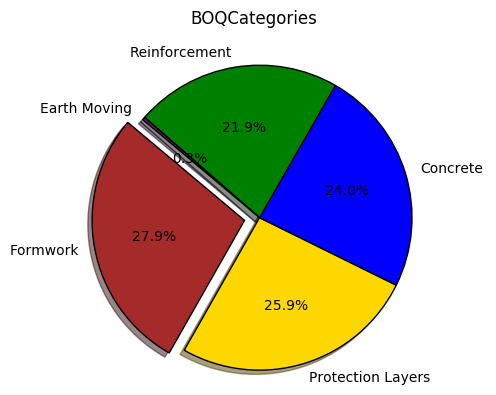

In [96]:
# 7.a

labels = pd.value_counts(RawConstruction.BOQCategory).keys()
sizes = pd.value_counts(RawConstruction.BOQCategory)

# Explode the most frequent category:
explode = [0] * len(sizes)
explode[np.argmax(list(sizes))] = 0.1

# Draw pie chart
# labels = ['Reinforcement', 'Concrete', 'Formwork', 'Protection Layers', 'Earth Moving']
properties = plt.pie(sizes, labels=labels, explode=explode, colors = ['brown', 'gold', 'blue', 'green', 'purple'], shadow=True, startangle=140, autopct='%1.1f%%')

# Rotate labels:
# [0] = wedges, [1] = labels, [2] = fractions
# for i in range(len(properties[0])):
#     angle = (properties[0][i].theta2 + properties[0][i].theta1) / 2  # find angle in the position of the label
#     if angle < 180:  # rotate upside down labels
#         angle = angle - 90
#     properties[1][i].set_rotation(angle)  # set label rotation
#     properties[2][i].set_rotation(angle)  # set fraction rotation
    
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('BOQCategories', y=1.1)
plt.show()

C:\Users\Nikos Spanos\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
ERROR:root:Line magic function `%matplotlib.inline` not found.


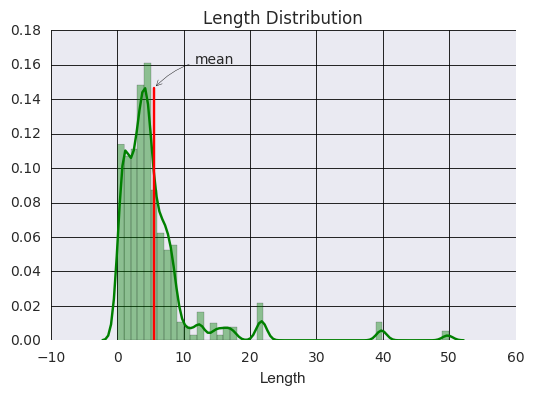

In [136]:
# 7.b

x = sns.distplot(RawConstruction.Length.dropna(), color = 'green')
mn = RawConstruction.Length.mean()
mx = x.lines[0].get_ydata().max()
x.plot([mn]*2, [0, mx], color = 'red')
x.set_title('Length Distribution')
x.grid(color='black', linestyle='-', linewidth=0.6)
plt.annotate('mean', [mn, mx],  xytext=[mn*2.1, mx*1.1], fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color='black'))
%matplotlib.inline

In [206]:
fig = x.get_figure()
fig.savefig('Lenght.png')

C:\Users\Nikos Spanos\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
ERROR:root:Line magic function `%matplotlib.inline` not found.


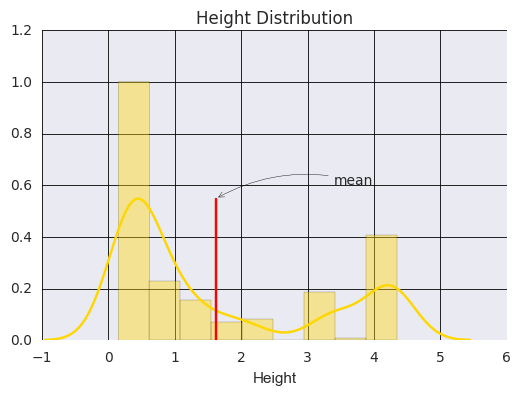

In [213]:
x = sns.distplot(RawConstruction.Height.dropna(), color='gold')
mn = RawConstruction.Height.mean()
mx = x.lines[0].get_ydata().max()
x.plot([mn]*2, [0, mx], color = 'red')
x.set_title('Height Distribution')
x.grid(color='black', linestyle='-', linewidth=0.6)
plt.annotate('mean', [mn, mx],  xytext=[mn*2.1, mx*1.1], fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color='black'))
%matplotlib.inline

In [205]:
fig = x.get_figure()
fig.savefig('Height.png')

C:\Users\Nikos Spanos\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
ERROR:root:Line magic function `%matplotlib.inline` not found.


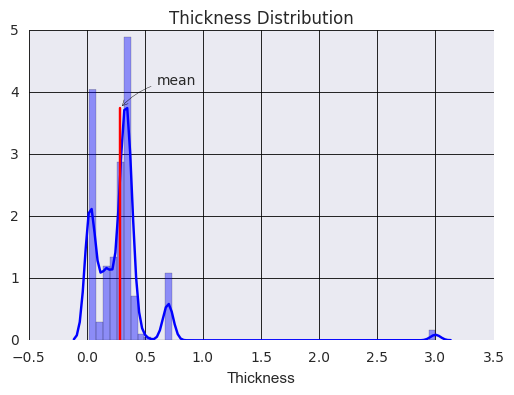

In [215]:
x = sns.distplot(RawConstruction.Thickness.dropna(), color='b')
mn = RawConstruction.Thickness.mean()
mx = x.lines[0].get_ydata().max()
x.plot([mn]*2, [0, mx], color = 'red')
x.set_title('Thickness Distribution')
x.grid(color='black', linestyle='-', linewidth=0.6)
plt.annotate('mean', [mn, mx],  xytext=[mn*2.1, mx*1.1], fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color='black'))
%matplotlib.inline

Correlation: 0.557214159222


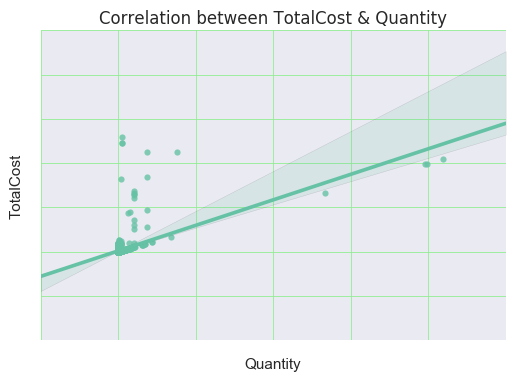

In [183]:
# 7.c

RawConstruction.TotalCost = RawConstruction.TotalCost.astype(float) # we need to cast this as an int as well
ax = sns.regplot(x='Quantity', y='TotalCost', data=RawConstruction[RawConstruction.TotalCost < 30000])
ax.set_xticklabels(['']*RawConstruction.shape[0])
ax.set_yticklabels(['']*RawConstruction.shape[0])
ax.grid(color='lightgreen', linestyle='-', linewidth=0.6)
ax.set_title('Correlation between TotalCost & Quantity')

print('Correlation:', RawConstruction.corr()['Quantity']['TotalCost'])

In [203]:
fig = ax.get_figure()
fig.savefig('Correlation.png')

In [193]:
# RawConstruction[(RawConstruction.TotalCost<500)].TotalCost

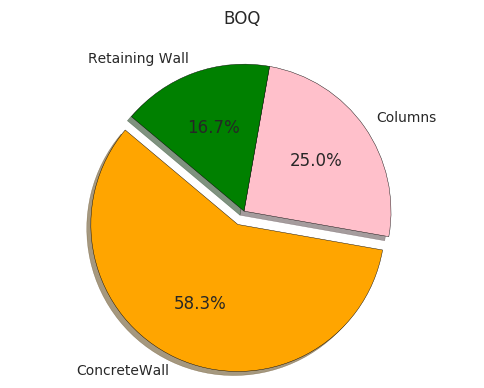

In [192]:
# 7.d

def wall(x):
    return 'walls' in x.lower()
Schedule[Schedule.BOQ.apply(wall)].ConstructionElementType.value_counts()

data = Schedule[Schedule.BOQ.apply(wall)].ConstructionElementType.value_counts()
labels = pd.value_counts(data).keys()
sizes = data

# Explode the most frequent category:
explode = [0] * len(sizes)
explode[np.argmax(list(sizes))] = 0.1

# Draw pie chart
labels = ['ConcreteWall', 'Columns', 'Retaining Wall']
properties = plt.pie(sizes, labels=labels, explode=explode, colors = ['orange', 'pink', 'green'], shadow=True, startangle=140, autopct='%1.1f%%')

# Rotate labels:
# [0] = wedges, [1] = labels, [2] = fractions
# for i in range(len(properties[0])):
#     angle = (properties[0][i].theta2 + properties[0][i].theta1) / 2  # find angle in the position of the label
#     if angle < 180:  # rotate upside down labels
#         angle = angle - 90
#     properties[1][i].set_rotation(angle)  # set label rotation
#     properties[2][i].set_rotation(angle)  # set fraction rotation
    
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('BOQ', y= 1.1)
plt.show()

In [202]:
# fig = properties.get_figure()
# fig.savefig('BOQ.png')

AttributeError: 'tuple' object has no attribute 'get_figure'

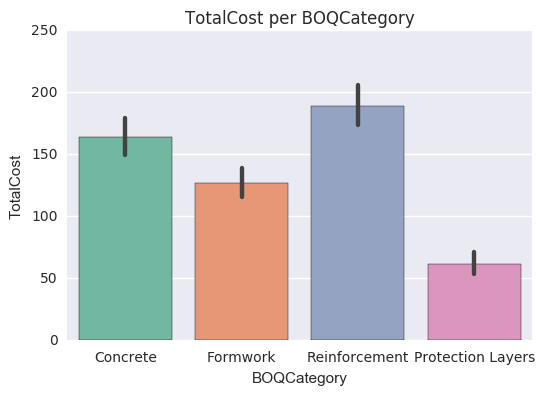

In [207]:
# 7.e

an = sns.barplot(x='BOQCategory', y='TotalCost', data=RawConstruction[RawConstruction.TotalCost < 1000])
plt.xticks(rotation='horizontal')
#plt.ylim(0, 1000)
plt.title('TotalCost per BOQCategory')

In [208]:
fig = an.get_figure()
fig.savefig('TotalCost per BOQCategory.png')

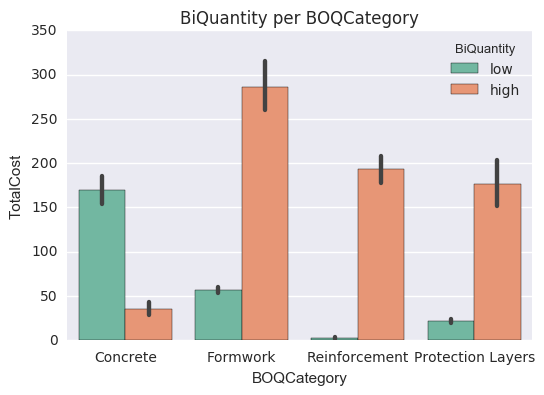

In [195]:
# 7.f

x = sns.barplot(x='BOQCategory', y='TotalCost', hue='BiQuantity', data=RawConstruction[RawConstruction.TotalCost < 1000])
plt.xticks(rotation='horizontal')
#plt.ylim(0, 1000)
plt.title('BiQuantity per BOQCategory')


In [199]:
fig = x.get_figure()
fig.savefig('BiQuantity per BOQCategory.png')